# **Capstone Project - Fitbit Consumer Behavior Analysis**

The given dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents the use of different Fitbit trackers and individual tracking behaviors/preferences.
This dataset contains 18 different files like dailyActivity, dailyCalories, hourlySteps, etc…


### Importing the required libraries

In [231]:
import pandas as pd
import numpy as np

Reading the given csv file data and storing it into variable for further process

In [232]:
sleepday=pd.read_csv("/content/sleepDay_merged.csv")

displaying first 5 rows for viewing the data

In [233]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [234]:
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


## **Descriptive Numeric Analysis**

In [235]:
sleepday.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


Checking for null values

In [236]:
sleepday.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [237]:
sleepday.value_counts()

Id          SleepDay               TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
8378563200  4/25/2016 12:00:00 AM  1                  388                 402               2
4388161847  5/5/2016 12:00:00 AM   1                  471                 495               2
4702921684  5/7/2016 12:00:00 AM   1                  520                 543               2
1503960366  4/12/2016 12:00:00 AM  1                  327                 346               1
5577150313  4/25/2016 12:00:00 AM  1                  421                 461               1
                                                                                           ..
4319703577  5/10/2016 12:00:00 AM  1                  487                 517               1
            5/1/2016 12:00:00 AM   1                  484                 500               1
            4/30/2016 12:00:00 AM  1                  490                 516               1
            4/29/2016 12:00:00 AM  1                  523        

Doing the same with all the datasets for insights

In [238]:
dailyact=pd.read_csv("/content/dailyActivity_merged.csv")

In [239]:
dailyact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [240]:
dailyact.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [241]:
dailyact.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [242]:
dailycal=pd.read_csv("/content/dailyCalories_merged.csv")

In [243]:
dailycal

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
...,...,...,...
935,8877689391,5/8/2016,2847
936,8877689391,5/9/2016,3710
937,8877689391,5/10/2016,2832
938,8877689391,5/11/2016,3832


In [244]:
dailycal.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [245]:
dailycal.isnull().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

In [246]:
dailyint=pd.read_csv("/content/dailyIntensities_merged.csv")

In [247]:
dailyint.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [248]:
dailyint.isnull().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [249]:
dailyint.dtypes

Id                            int64
ActivityDay                  object
SedentaryMinutes              int64
LightlyActiveMinutes          int64
FairlyActiveMinutes           int64
VeryActiveMinutes             int64
SedentaryActiveDistance     float64
LightActiveDistance         float64
ModeratelyActiveDistance    float64
VeryActiveDistance          float64
dtype: object

In [250]:
dailyact.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [251]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [252]:
dailysteps=pd.read_csv("/content/dailySteps_merged.csv")

In [253]:
dailysteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [254]:
dailysteps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [255]:
dailysteps.describe()

,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


In [256]:
dailysteps.isnull().sum()

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

In [257]:
heartrate=pd.read_csv("/content/heartrate_seconds_merged.csv")

In [258]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [259]:
heartrate.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [260]:
heartrate.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [261]:
hourlycal=pd.read_csv("/content/hourlyCalories_merged.csv")

In [262]:
hourlycal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [263]:
hourlycal

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126
22095,8877689391,5/12/2016 11:00:00 AM,192
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101


In [264]:
hourlyint=pd.read_csv("/content/hourlyIntensities_merged.csv")

In [265]:
hourlyint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [266]:
hourlyint.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [267]:
hourlyint.isnull().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [268]:
hourlysteps=pd.read_csv("/content/hourlySteps_merged.csv")

In [269]:
hourlysteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [270]:
hourlysteps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [271]:
hourlysteps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [272]:
hourlysteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [273]:
mincalnar=pd.read_csv("/content/minuteCaloriesNarrow_merged.csv")

In [274]:
mincalnar.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [275]:
mincalnar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


In [276]:
mincalnar.isnull().sum()

Id                0
ActivityMinute    0
Calories          0
dtype: int64

In [277]:
mincalwide=pd.read_csv("/content/minuteCaloriesWide_merged.csv")

In [278]:
mincalwide.isnull().sum()

Id              0
ActivityHour    0
Calories00      0
Calories01      0
Calories02      0
               ..
Calories55      0
Calories56      0
Calories57      0
Calories58      0
Calories59      0
Length: 62, dtype: int64

In [279]:
mincalwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            21645 non-null  int64  
 1   ActivityHour  21645 non-null  object 
 2   Calories00    21645 non-null  float64
 3   Calories01    21645 non-null  float64
 4   Calories02    21645 non-null  float64
 5   Calories03    21645 non-null  float64
 6   Calories04    21645 non-null  float64
 7   Calories05    21645 non-null  float64
 8   Calories06    21645 non-null  float64
 9   Calories07    21645 non-null  float64
 10  Calories08    21645 non-null  float64
 11  Calories09    21645 non-null  float64
 12  Calories10    21645 non-null  float64
 13  Calories11    21645 non-null  float64
 14  Calories12    21645 non-null  float64
 15  Calories13    21645 non-null  float64
 16  Calories14    21645 non-null  float64
 17  Calories15    21645 non-null  float64
 18  Calories16    21645 non-nu

In [280]:
mincalwide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


In [281]:
mincalwide.isnull().sum()

Id              0
ActivityHour    0
Calories00      0
Calories01      0
Calories02      0
               ..
Calories55      0
Calories56      0
Calories57      0
Calories58      0
Calories59      0
Length: 62, dtype: int64

In [282]:
minintnar=pd.read_csv("/content/minuteIntensitiesNarrow_merged.csv")

In [283]:
minintnar.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [284]:
minintnar.describe()

,Id,Intensity
count,1.325580e+06,1.325580e+06
mean,4.847898e+09,2.005937e-01
std,2.422313e+09,5.190227e-01
min,1.503960e+09,0.000000e+00
25%,2.320127e+09,0.000000e+00
50%,4.445115e+09,0.000000e+00
75%,6.962181e+09,0.000000e+00
max,8.877689e+09,3.000000e+00


In [285]:
minintnar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [286]:
minintwide=pd.read_csv("/content/minuteIntensitiesWide_merged.csv")

In [287]:
minintwide.describe()

,Id,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,Intensity08,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
count,2.164500e+04,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
mean,4.836965e+09,0.199723,0.203326,0.208177,0.203835,0.205082,0.204897,0.206560,0.201894,0.202310,...,0.201016,0.195796,0.198337,0.199399,0.200139,0.198753,0.195565,0.199122,0.198244,0.195426
std,2.424088e+09,0.509819,0.515432,0.521394,0.518137,0.521956,0.521054,0.523053,0.519074,0.522594,...,0.514814,0.510299,0.511264,0.513331,0.512142,0.511238,0.506435,0.511907,0.510124,0.503423
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.962181e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.877689e+09,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [288]:
minintwide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
minMETnar=pd.read_csv("/content/minuteMETsNarrow_merged.csv")

In [290]:
minMETnar.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [291]:
minMETnar.dtypes

Id                 int64
ActivityMinute    object
METs               int64
dtype: object

In [292]:
minMETnar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [293]:
minsleepmerge=pd.read_csv("/content/minuteSleep_merged.csv")

In [294]:
minsleepmerge.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [295]:
minsleepmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


In [296]:
minstepsnarr=pd.read_csv("/content/minuteStepsNarrow_merged.csv")

In [297]:
minstepsnarr.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [298]:
minstepsnarr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [299]:
minstepwide=pd.read_csv("/content/minuteStepsWide_merged.csv")

In [300]:
minstepwide.describe()

,Id,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,Steps08,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
count,2.164500e+04,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.00000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
mean,4.836965e+09,5.304366,5.335412,5.531439,5.469439,5.461862,5.590252,5.559483,5.412474,5.35879,...,5.329175,5.194456,5.225595,5.145484,5.223654,5.281220,5.179533,5.251836,5.143636,5.288935
std,2.424088e+09,17.783331,17.678358,18.079791,18.106414,18.288469,18.565165,18.484912,18.335665,18.20523,...,17.870527,17.601857,17.618497,17.570195,17.684634,17.828413,17.569268,17.686583,17.427494,17.721454
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.962181e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.877689e+09,186.000000,180.000000,182.000000,182.000000,181.000000,180.000000,181.000000,183.000000,180.00000,...,182.000000,181.000000,181.000000,181.000000,184.000000,181.000000,182.000000,182.000000,180.000000,189.000000


In [301]:
minstepwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Steps00       21645 non-null  int64 
 3   Steps01       21645 non-null  int64 
 4   Steps02       21645 non-null  int64 
 5   Steps03       21645 non-null  int64 
 6   Steps04       21645 non-null  int64 
 7   Steps05       21645 non-null  int64 
 8   Steps06       21645 non-null  int64 
 9   Steps07       21645 non-null  int64 
 10  Steps08       21645 non-null  int64 
 11  Steps09       21645 non-null  int64 
 12  Steps10       21645 non-null  int64 
 13  Steps11       21645 non-null  int64 
 14  Steps12       21645 non-null  int64 
 15  Steps13       21645 non-null  int64 
 16  Steps14       21645 non-null  int64 
 17  Steps15       21645 non-null  int64 
 18  Steps16       21645 non-null  int64 
 19  Step

In [302]:
weightlog=pd.read_csv("/content/weightLogInfo_merged.csv")

In [303]:
weightlog.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [304]:
weightlog.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [305]:
weightlog.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


5

In [306]:
import pandas as pd

# Define file paths for your CSV files
dailyact_file = '/content/dailyActivity_merged.csv'
dailycal_file = '/content/dailyCalories_merged.csv'
daily_int = '/content/dailyIntensities_merged.csv'
dailysteps_file = '/content/dailySteps_merged.csv'

sleepday_file = '/content/sleepDay_merged.csv'
weightlog_file = '/content/weightLogInfo_merged.csv'

# Define chunk size
chunksize = 20000  # Adjust as needed

# Define a function to merge dataframes in chunks
def merge_dataframes_in_chunks(files):
    dfs = []
    for file in files:
        for chunk in pd.read_csv(file, chunksize=chunksize):
            dfs.append(chunk)
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

# List of file paths
files = [dailyact_file, dailycal_file,daily_int,dailysteps_file, sleepday_file, weightlog_file]

# Merge dataframes in chunks
merged_df = merge_dataframes_in_chunks(files)

# Perform merge operation
merged_df = pd.merge(merged_df, merged_df, on="Id")

# Print the merged dataframe
print(merged_df)


                Id ActivityDate_x  TotalSteps_x  TotalDistance_x  \
0       1503960366      4/12/2016       13162.0              8.5   
1       1503960366      4/12/2016       13162.0              8.5   
2       1503960366      4/12/2016       13162.0              8.5   
3       1503960366      4/12/2016       13162.0              8.5   
4       1503960366      4/12/2016       13162.0              8.5   
...            ...            ...           ...              ...   
574769  8877689391            NaN           NaN              NaN   
574770  8877689391            NaN           NaN              NaN   
574771  8877689391            NaN           NaN              NaN   
574772  8877689391            NaN           NaN              NaN   
574773  8877689391            NaN           NaN              NaN   

        TrackerDistance_x  LoggedActivitiesDistance_x  VeryActiveDistance_x  \
0                     8.5                         0.0                  1.88   
1                     8.5

<ipython-input-306-e4da2d001c8f>:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(merged_df)


In [307]:
merged_df.head()

,Id,ActivityDate_x,TotalSteps_x,TotalDistance_x,TrackerDistance_x,LoggedActivitiesDistance_x,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords_y,TotalMinutesAsleep_y,TotalTimeInBed_y,Date_y,WeightKg_y,WeightPounds_y,Fat_y,BMI_y,IsManualReport_y,LogId_y
0,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Renaming the column name**

In [308]:
data1= pd.DataFrame(merged_df)

# Rename columns by removing _x and _y suffixes
data1 = data1.rename(columns=lambda x: x.replace('_x', ''))
data1 = data1.rename(columns=lambda x: x.replace('_y', ''))

# Print the modified DataFrame
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data storing in csv file

In [309]:

data1.to_csv('/content/daily_stats_data.csv', index=False)


**Let's Start Data Visualization**


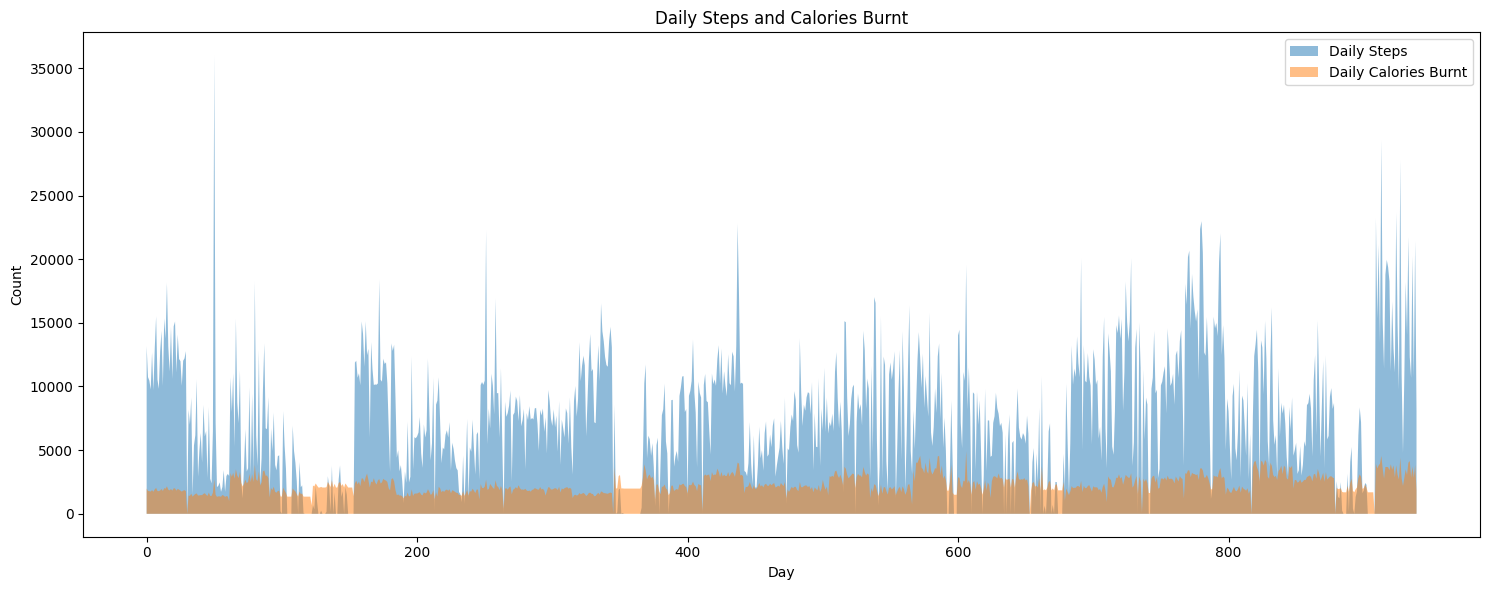

In [310]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.fill_between(dailyact.index, dailyact['TotalSteps'], label='Daily Steps', alpha=0.5)
plt.fill_between(dailyact.index, dailyact['Calories'], label='Daily Calories Burnt', alpha=0.5)
plt.title('Daily Steps and Calories Burnt')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


In [311]:
hourlycal

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126
22095,8877689391,5/12/2016 11:00:00 AM,192
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101


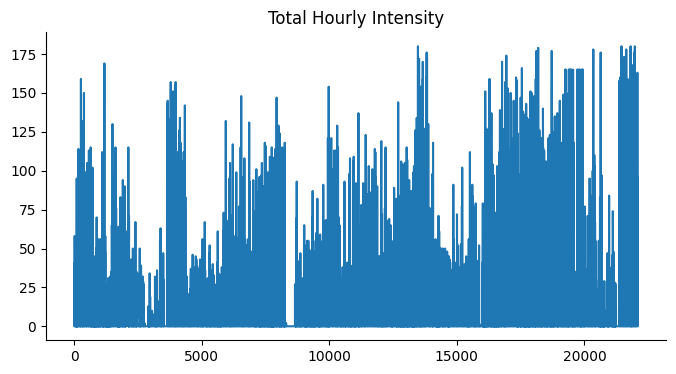

In [312]:
hourlyint['TotalIntensity'].plot(kind='line', figsize=(8, 4), title='Total Hourly Intensity')
plt.gca().spines[['top', 'right']].set_visible(False)

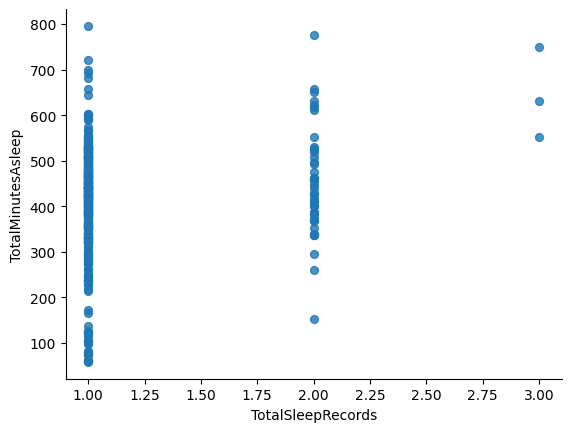

In [313]:
sleepday.plot(kind='scatter', x='TotalSleepRecords', y='TotalMinutesAsleep', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [314]:
merged_df=pd.merge(hourlycal,hourlyint,on="Id")
data = pd.DataFrame(merged_df)

# Rename columns by removing _x and _y suffixes
# data = data.rename(columns=lambda x: x.replace('_x', ''))
data = data.drop(columns=['ActivityHour_y'])
data = data.rename(columns=lambda x: x.replace('_x', ''))

data.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333
1,1503960366,4/12/2016 12:00:00 AM,81,8,0.133333
2,1503960366,4/12/2016 12:00:00 AM,81,7,0.116667
3,1503960366,4/12/2016 12:00:00 AM,81,0,0.000000
4,1503960366,4/12/2016 12:00:00 AM,81,0,0.000000


In [315]:
data['ActivityHour'] = data['ActivityHour'].str.replace(' 12:00:00 AM', '')
data.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016,81,20,0.333333
1,1503960366,4/12/2016,81,8,0.133333
2,1503960366,4/12/2016,81,7,0.116667
3,1503960366,4/12/2016,81,0,0.000000
4,1503960366,4/12/2016,81,0,0.000000


In [316]:

data.to_csv('/content/hourly_stats_data.csv', index=False)


In [317]:
mincalnar


,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,1.33353
1325576,8877689391,5/12/2016 1:56:00 PM,1.33353
1325577,8877689391,5/12/2016 1:57:00 PM,1.33353
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353


separating activity minute and activity date

In [318]:
mincalnar["ActivityDate"]=mincalnar["ActivityMinute"].str.split(" ").str[0]
mincalnar["ActivityMinute"]=mincalnar["ActivityMinute"].str.split(" ").str[1]

In [319]:
mincalnar.head()

,Id,ActivityMinute,Calories,ActivityDate
0,1503960366,12:00:00,0.7865,4/12/2016
1,1503960366,12:01:00,0.7865,4/12/2016
2,1503960366,12:02:00,0.7865,4/12/2016
3,1503960366,12:03:00,0.7865,4/12/2016
4,1503960366,12:04:00,0.7865,4/12/2016


In [320]:
minintnar

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,0
1325576,8877689391,5/12/2016 1:56:00 PM,0
1325577,8877689391,5/12/2016 1:57:00 PM,0
1325578,8877689391,5/12/2016 1:58:00 PM,0


Splitting time and date into two different columns

In [321]:
minintnar["ActivityDate"]=minintnar["ActivityMinute"].str.split(" ").str[0]
minintnar["ActivityMinute"]=minintnar["ActivityMinute"].str.split(" ").str[1]
minintnar.head()

,Id,ActivityMinute,Intensity,ActivityDate
0,1503960366,12:00:00,0,4/12/2016
1,1503960366,12:01:00,0,4/12/2016
2,1503960366,12:02:00,0,4/12/2016
3,1503960366,12:03:00,0,4/12/2016
4,1503960366,12:04:00,0,4/12/2016


Checking the data types

In [322]:
minintnar.dtypes

Id                 int64
ActivityMinute    object
Intensity          int64
ActivityDate      object
dtype: object

In [323]:
mincalnar.dtypes

Id                  int64
ActivityMinute     object
Calories          float64
ActivityDate       object
dtype: object

In [324]:
mincalnar.to_csv("/content/mincalnar.csv",index=False)

In [325]:
minintnar.to_csv("/content/minintnar.csv",index=False)

In [326]:
minintnar.head()

,Id,ActivityMinute,Intensity,ActivityDate
0,1503960366,12:00:00,0,4/12/2016
1,1503960366,12:01:00,0,4/12/2016
2,1503960366,12:02:00,0,4/12/2016
3,1503960366,12:03:00,0,4/12/2016
4,1503960366,12:04:00,0,4/12/2016


In [327]:
minstepnar=pd.read_csv("/content/minuteStepsNarrow_merged.csv")
minmet=pd.read_csv("/content/minuteMETsNarrow_merged.csv")


In [328]:
minmetcopy=minmet.copy()
minstepnarcopy=minstepnar.copy()
mincalnarcopy=mincalnar.copy()

# **Data Visualization**

In [329]:
data1.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/12/2016,13162.0,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Correlation Heatmap**

<ipython-input-330-1cb2b81d855c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


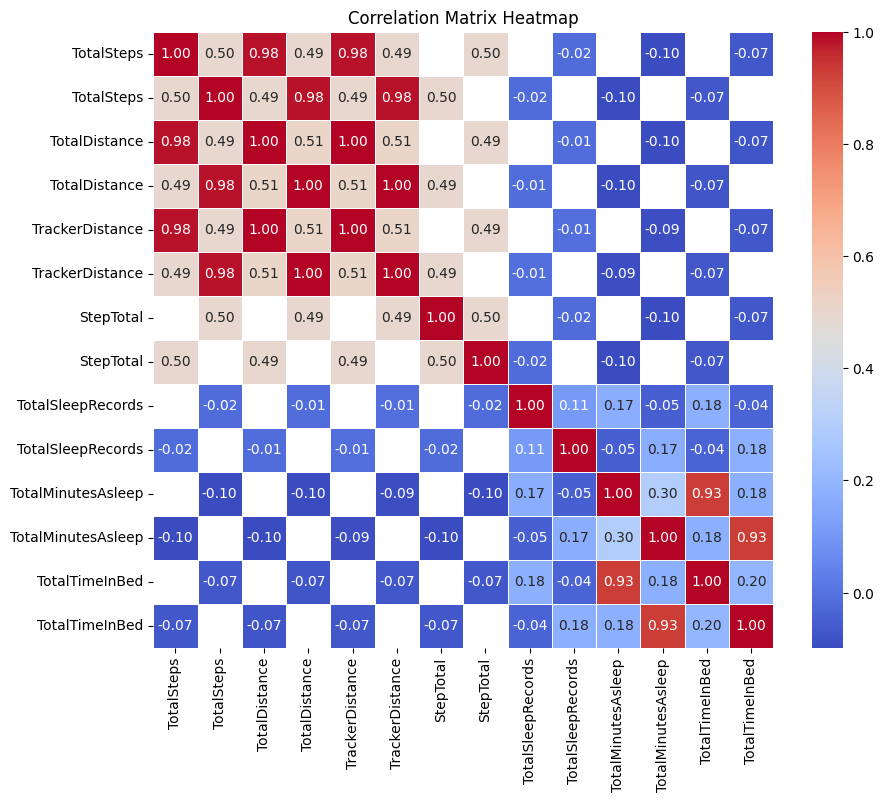

In [330]:
import seaborn as sns
col = ['ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'StepTotal', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep','TotalTimeInBed']
df=data1[col]
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## **Pie Chart of Activity Distribution**

In [331]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574774 entries, 0 to 574773
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Id                        574774 non-null  int64  
 1   ActivityDate              125717 non-null  object 
 2   TotalSteps                125717 non-null  float64
 3   TotalDistance             125717 non-null  float64
 4   TrackerDistance           125717 non-null  float64
 5   LoggedActivitiesDistance  125717 non-null  float64
 6   VeryActiveDistance        251434 non-null  float64
 7   ModeratelyActiveDistance  251434 non-null  float64
 8   LightActiveDistance       251434 non-null  float64
 9   SedentaryActiveDistance   251434 non-null  float64
 10  VeryActiveMinutes         251434 non-null  float64
 11  FairlyActiveMinutes       251434 non-null  float64
 12  LightlyActiveMinutes      251434 non-null  float64
 13  SedentaryMinutes          251434 non-null  f

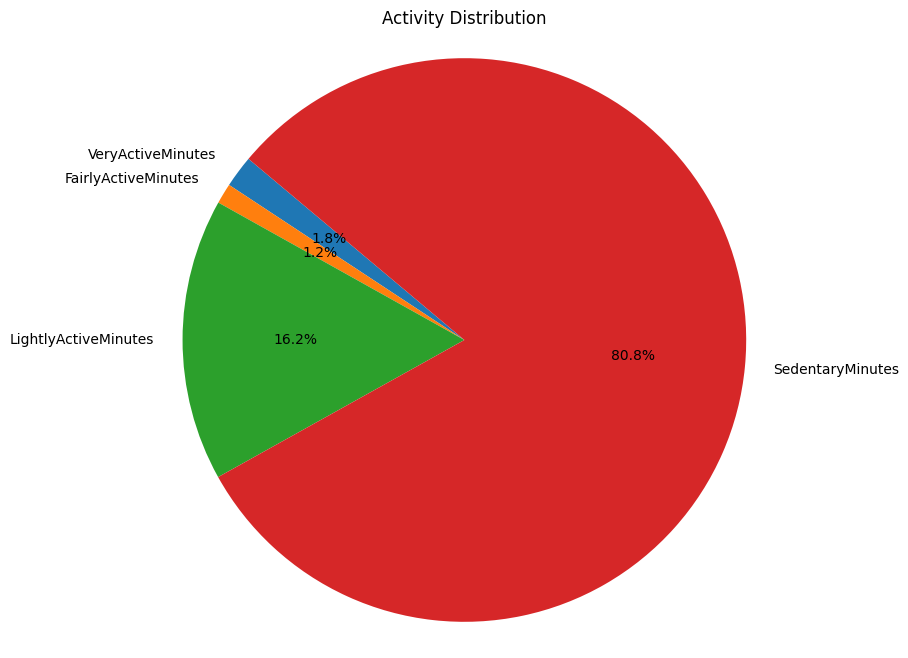

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded your data into a DataFrame named df
# You can drop duplicate columns to avoid redundancy
df = data1.loc[:,~data1.columns.duplicated()]

# Calculate total time spent in each activity level
activity_totals = df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(activity_totals, labels=activity_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Activity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


from the above pie chart , we observe that people has activity distribution of sedentary Minutes is more than any other.

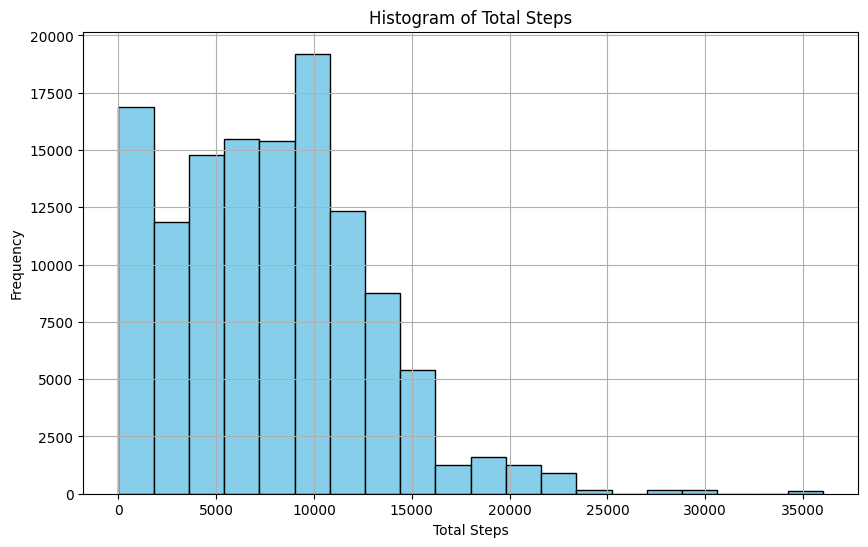

In [333]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalSteps'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [334]:
data.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016,81,20,0.333333
1,1503960366,4/12/2016,81,8,0.133333
2,1503960366,4/12/2016,81,7,0.116667
3,1503960366,4/12/2016,81,0,0.000000
4,1503960366,4/12/2016,81,0,0.000000


## **Line chart of calories burned over activity hour**

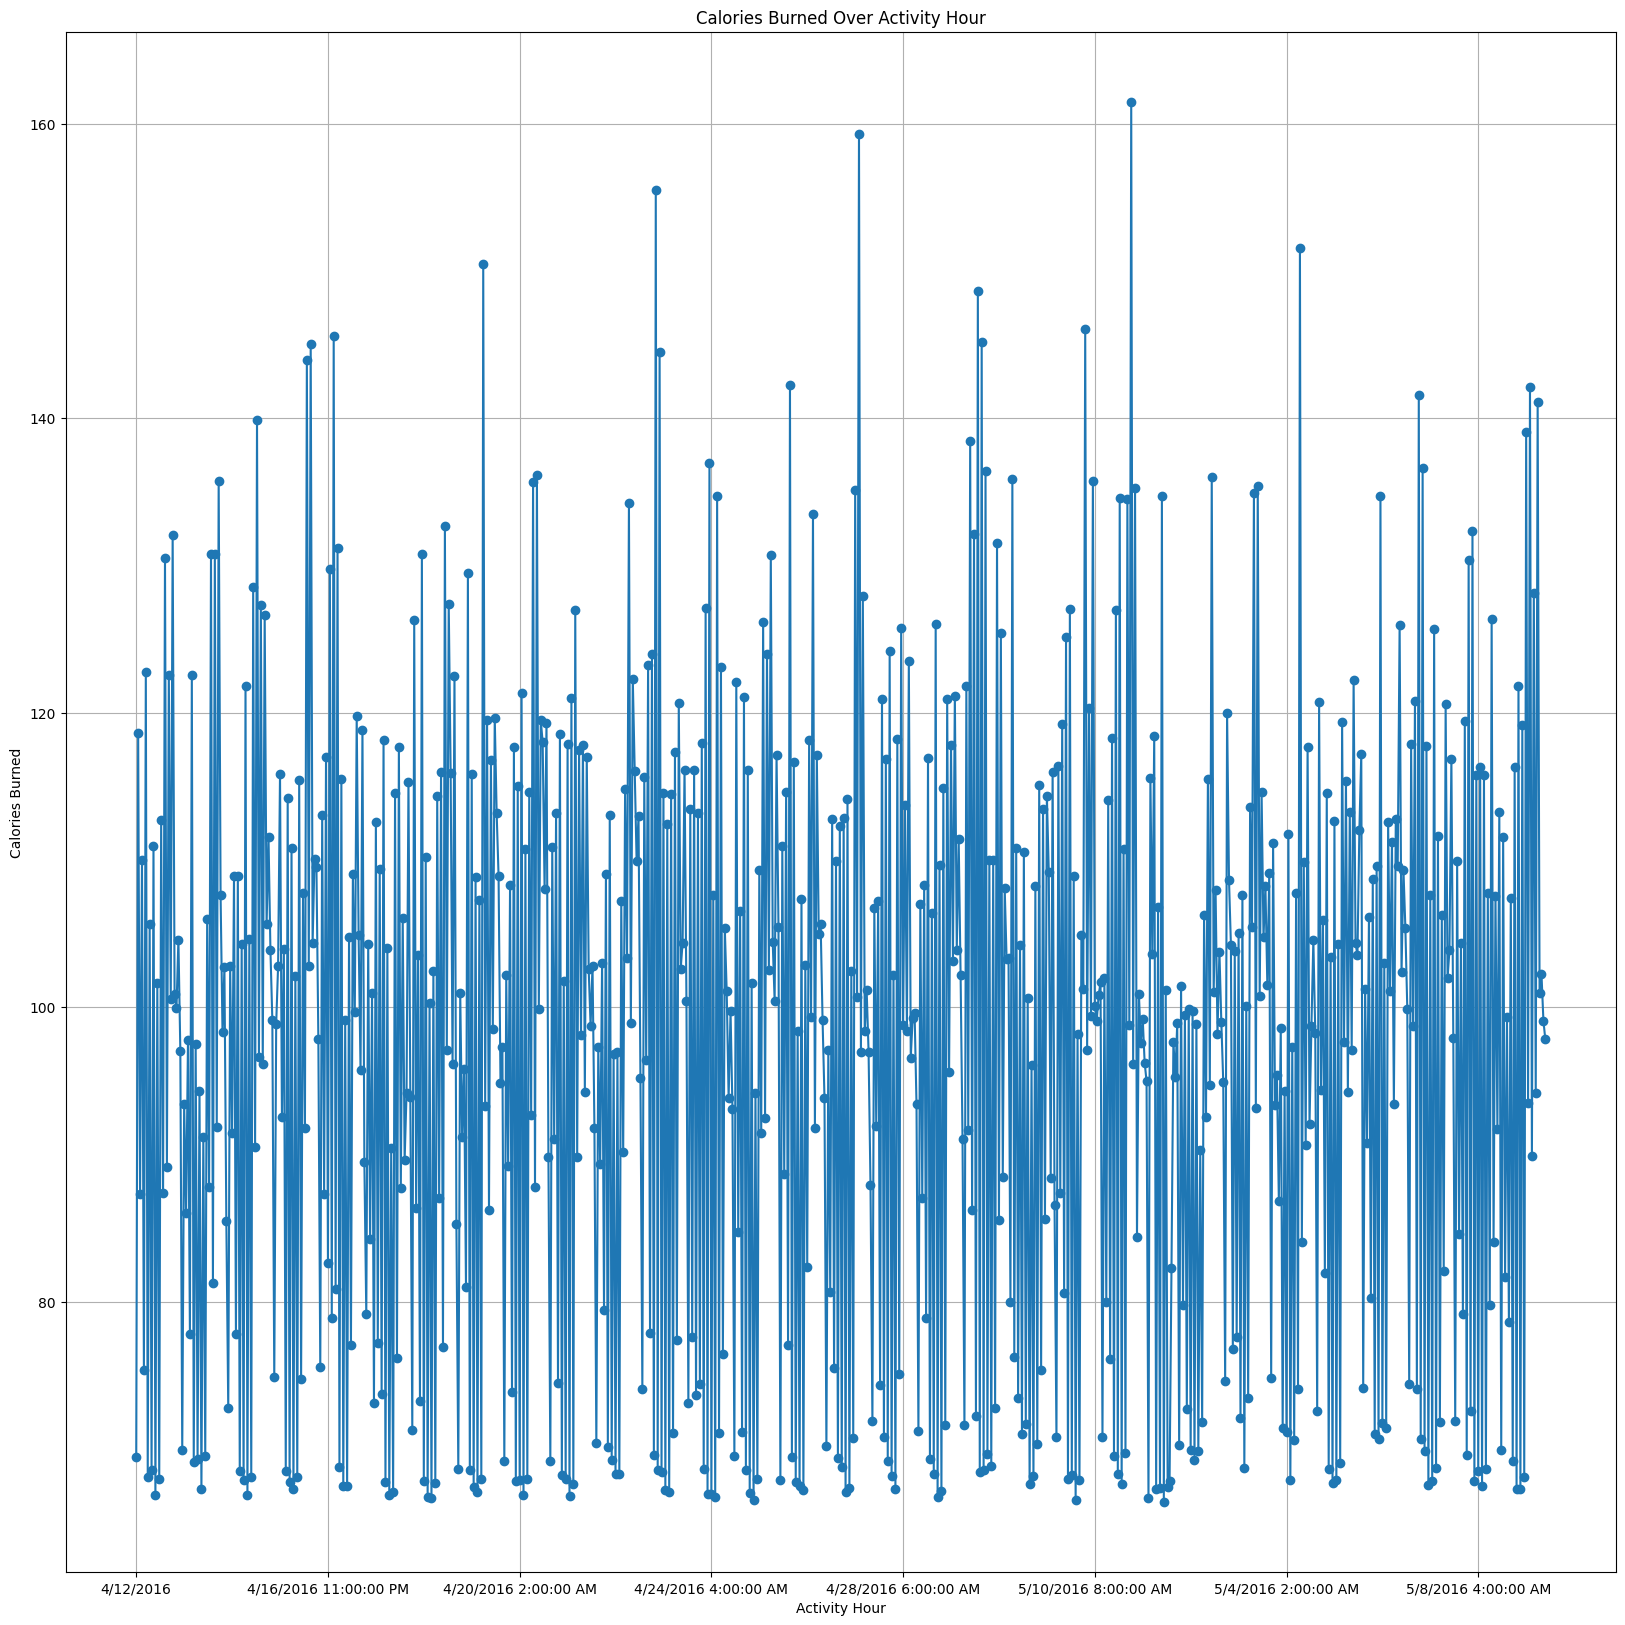

In [335]:
plt.figure(figsize=(20,20))
data.groupby('ActivityHour')['Calories'].mean().plot(marker='o')
plt.title('Calories Burned Over Activity Hour')
plt.xlabel('Activity Hour')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()


## **Histogram of average intensity**

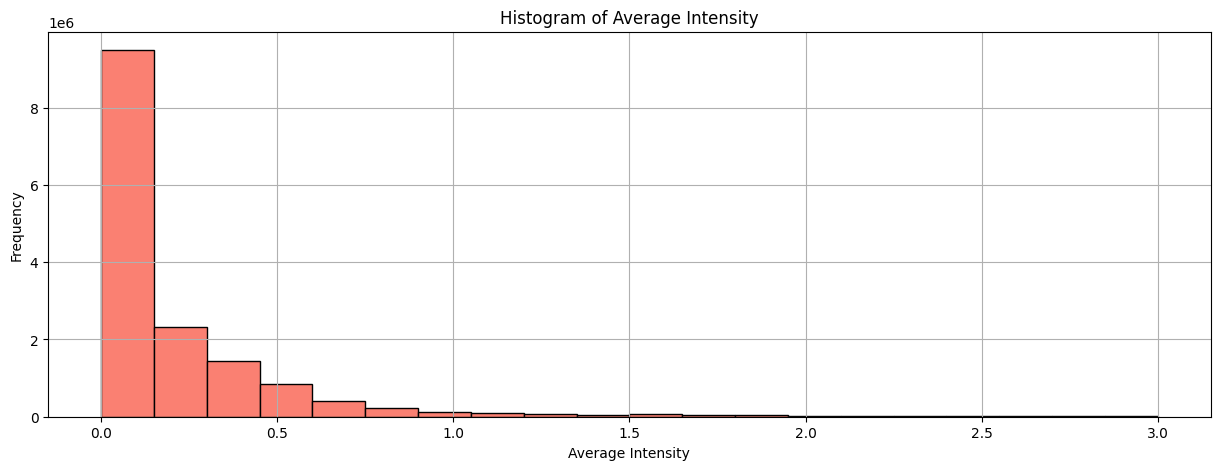

In [336]:
plt.figure(figsize=(15,5))
plt.hist(data['AverageIntensity'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Average Intensity')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [337]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


Splitting the data which can be useful for further analysis

In [338]:
heartrate["Date"]=heartrate["Time"].str.split(" ").str[0]
heartrate["Time"]=heartrate["Time"].str.split(" ").str[1]

In [339]:
heartrate.tail()

,Id,Time,Value,Date
2483653,8877689391,2:43:53,57,5/12/2016
2483654,8877689391,2:43:58,56,5/12/2016
2483655,8877689391,2:44:03,55,5/12/2016
2483656,8877689391,2:44:18,55,5/12/2016
2483657,8877689391,2:44:28,56,5/12/2016


## **Line chart of heart rate over time**

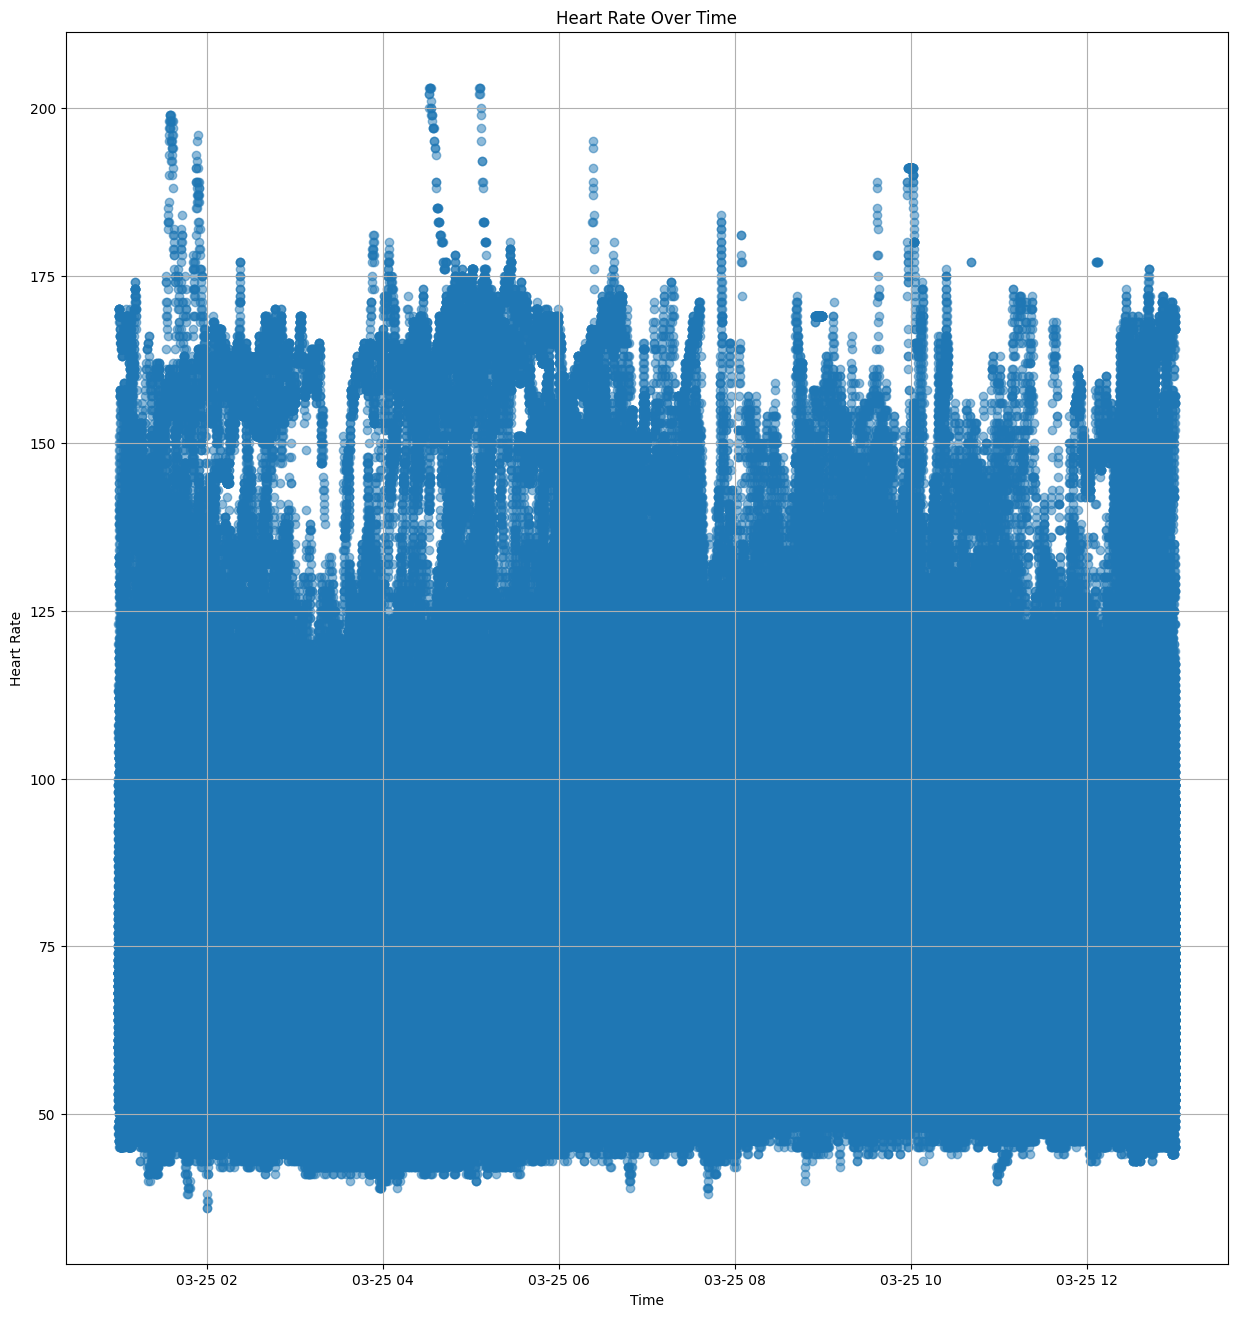

In [340]:
heartrate['Time'] = pd.to_datetime(heartrate['Time']) # converting into suitable dtype

plt.figure(figsize=(15, 16))
plt.scatter(heartrate['Time'], heartrate['Value'], alpha=0.5)
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

## **Scatter plot on Minutes Slept and Minutes on Bed**

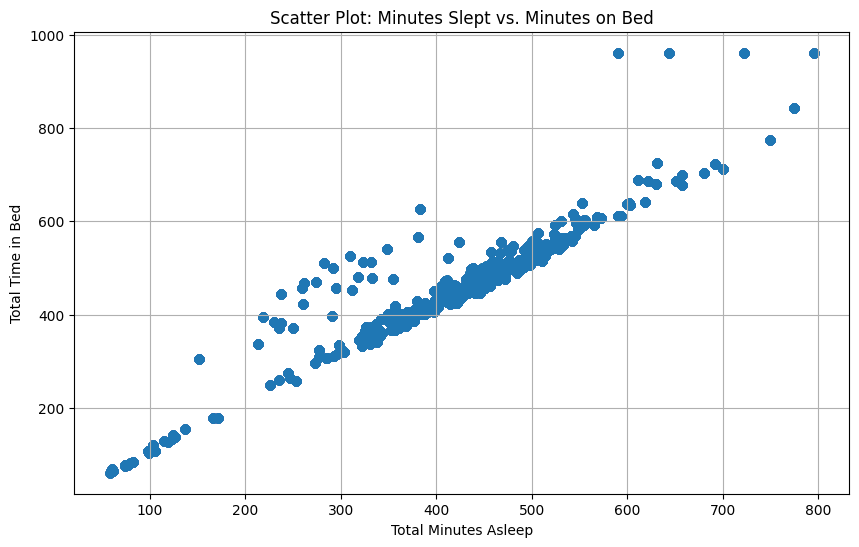

In [341]:
df = df.loc[:,~df.columns.duplicated()]

# Create scatter plot of minutes slept vs. minutes on bed
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalMinutesAsleep'], df['TotalTimeInBed'], alpha=0.5)
plt.title('Scatter Plot: Minutes Slept vs. Minutes on Bed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.grid(True)
plt.show()

In [342]:
sleepday

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


## **Box Plot of Total Minutes Asleep by Sleep Day**

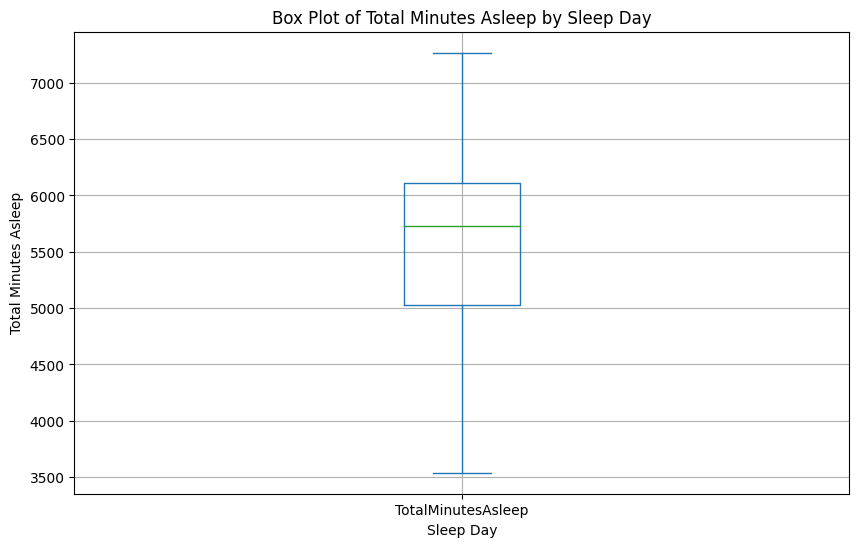

In [343]:
total_minutes_asleep_by_day = sleepday.groupby('SleepDay')['TotalMinutesAsleep'].sum()

# Create a box plot
plt.figure(figsize=(10, 6))
total_minutes_asleep_by_day.plot(kind='box')
plt.title('Box Plot of Total Minutes Asleep by Sleep Day')
plt.xlabel('Sleep Day')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)
plt.show()

## **Scatter Plot of Total Minutes Asleep vs. Total Time in Bed by Sleep Day**

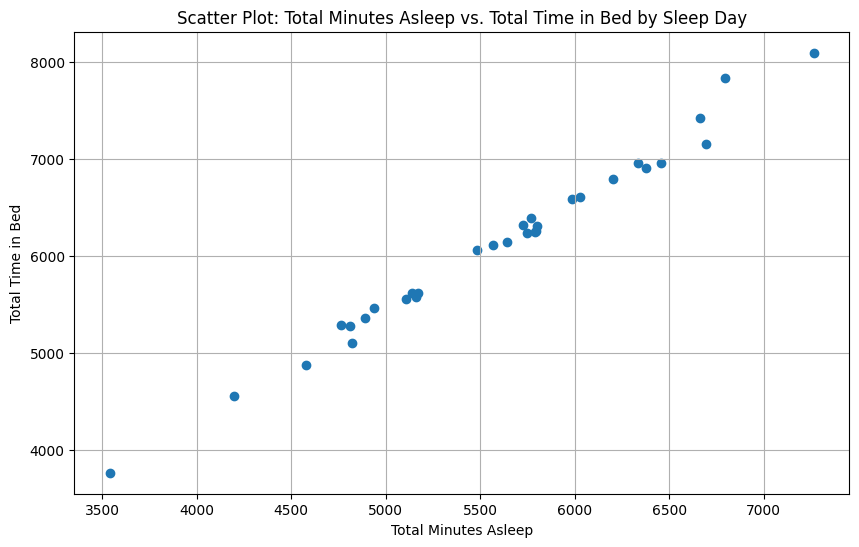

In [344]:
sleep_day_data = sleepday.groupby('SleepDay').agg({'TotalMinutesAsleep': 'sum', 'TotalTimeInBed': 'sum'})

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sleep_day_data['TotalMinutesAsleep'], sleep_day_data['TotalTimeInBed'])
plt.title('Scatter Plot: Total Minutes Asleep vs. Total Time in Bed by Sleep Day')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.grid(True)
plt.show()

## **Scatter Plot of Calories at Different Activity Hours**



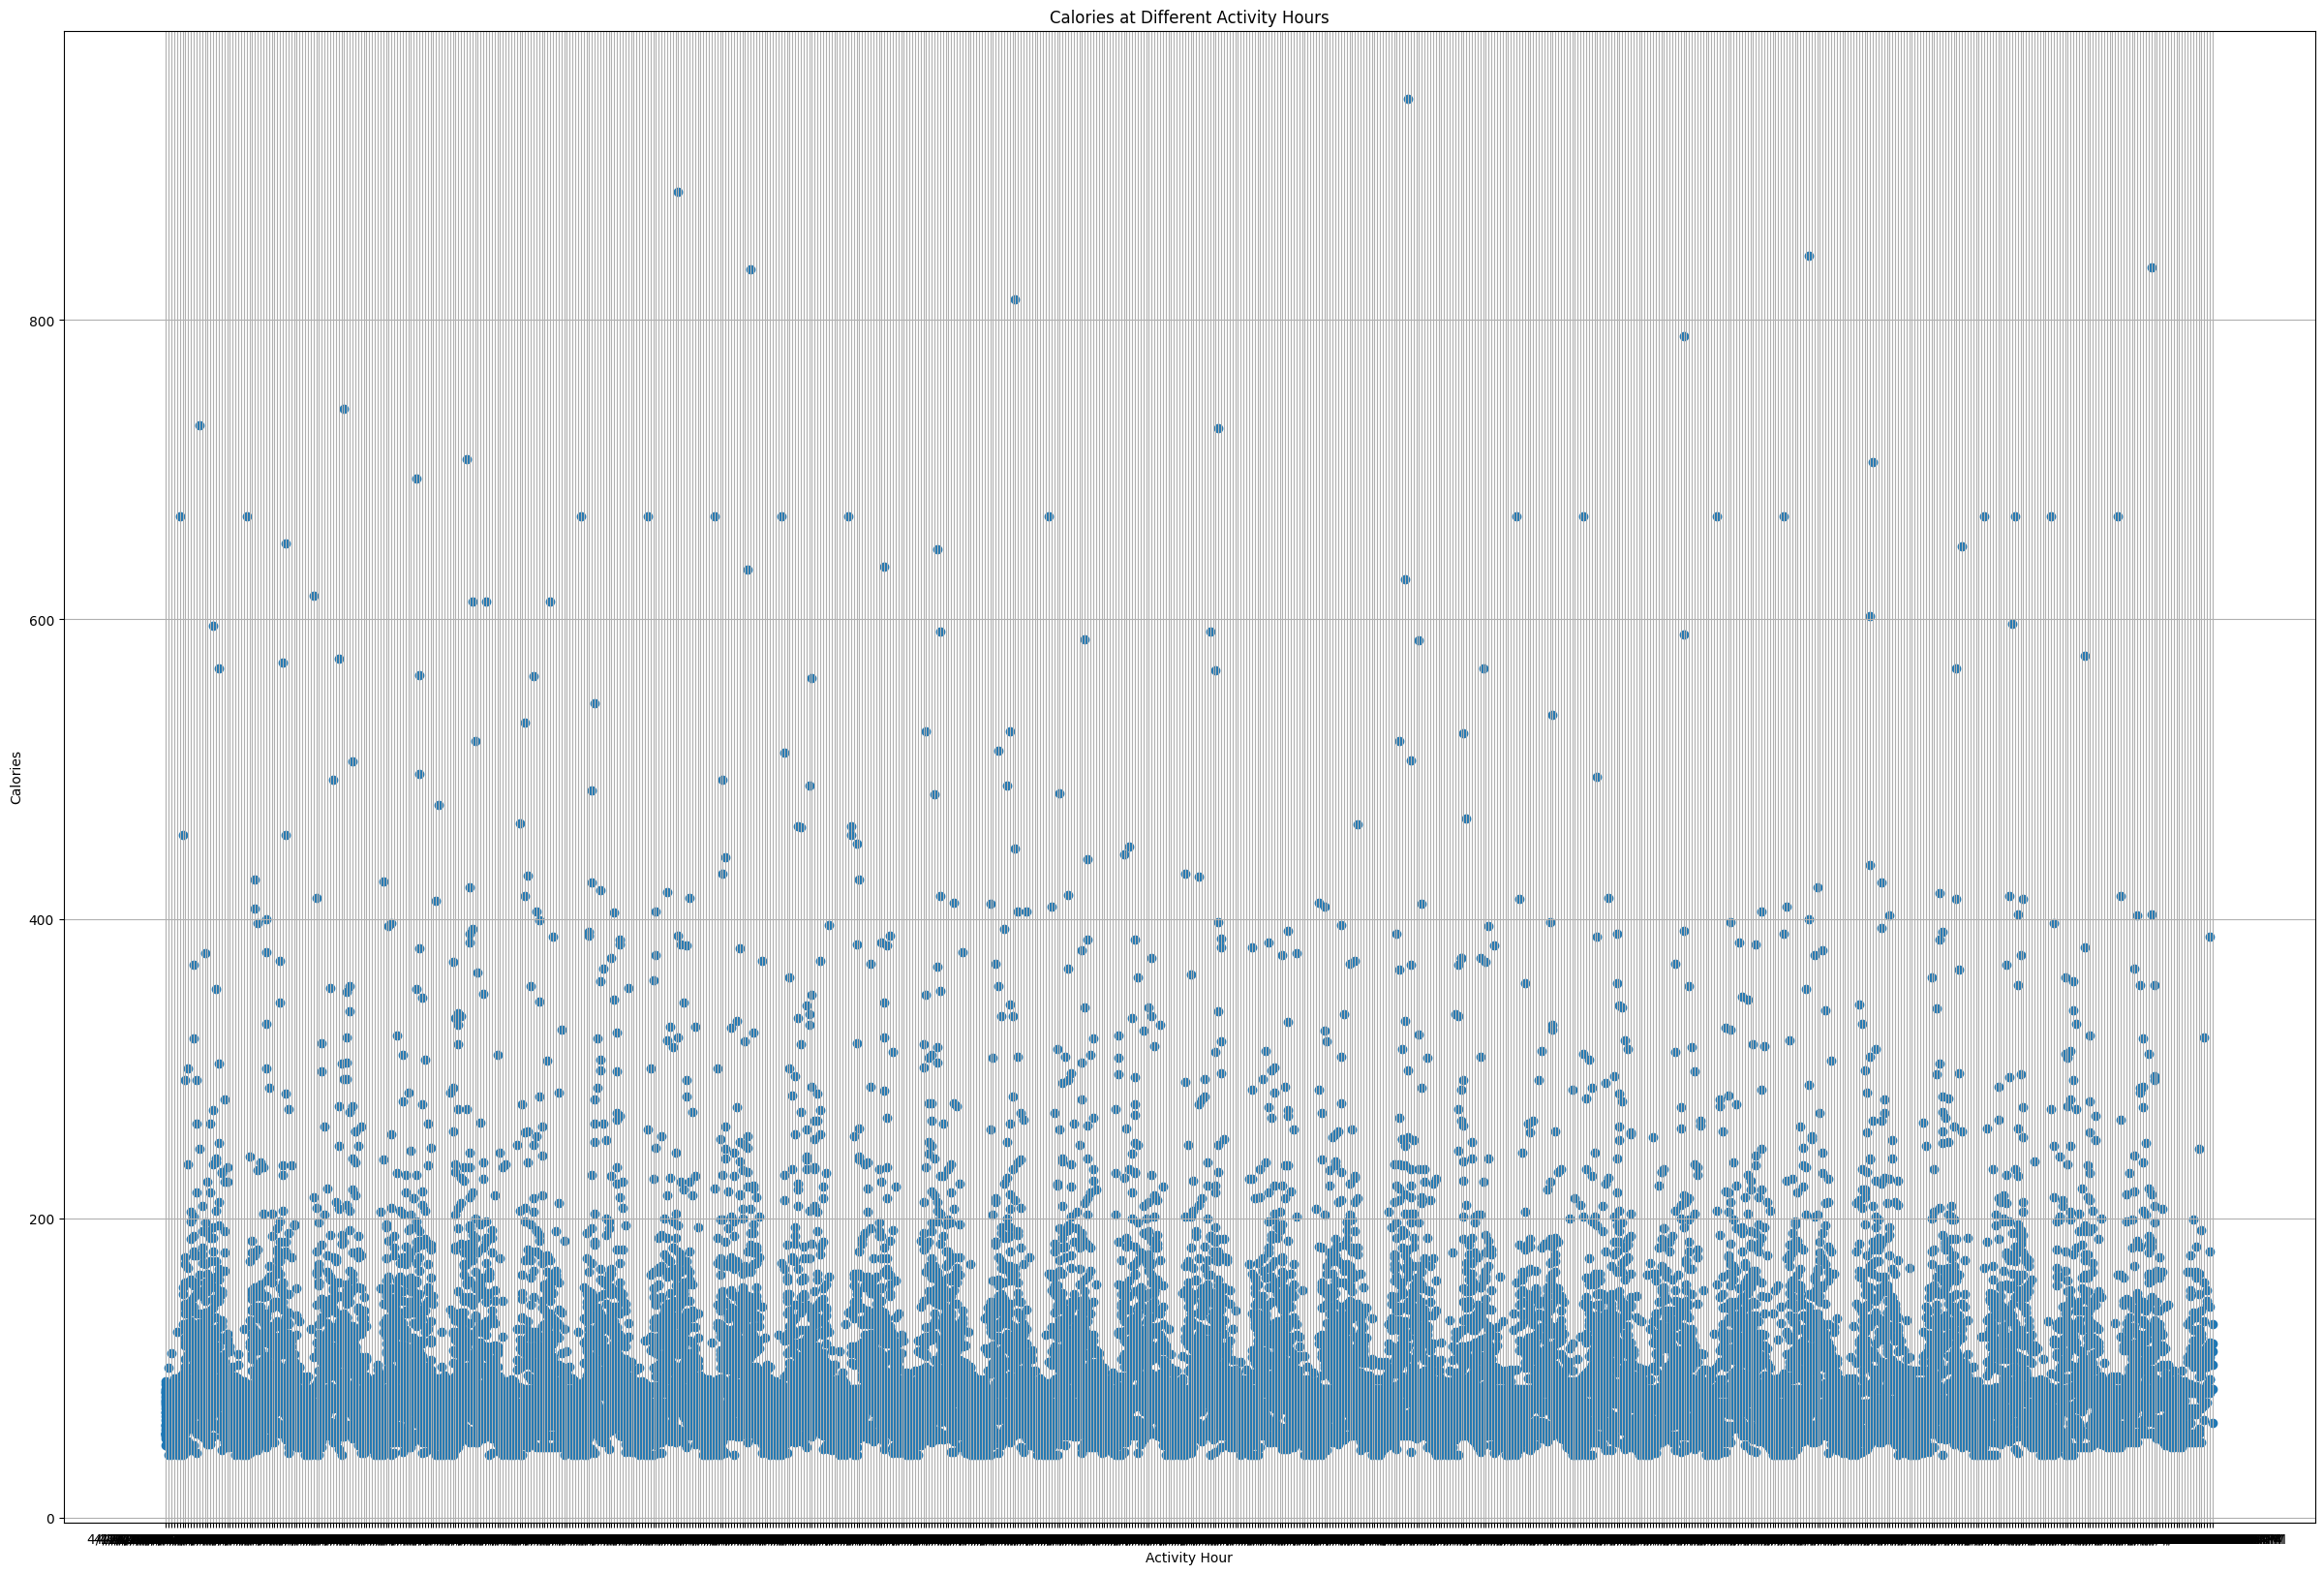

In [345]:
plt.figure(figsize=(30,20))
plt.scatter(hourlycal['ActivityHour'], hourlycal['Calories'])
plt.title('Calories at Different Activity Hours')
plt.xlabel('Activity Hour')
plt.ylabel('Calories')
plt.grid(True)
plt.show()